In [1]:
import math
import pandas as pd
from plotnine import *

data_file = "~/Documents/ogle/ogle4/smc/RRab_extra.csv"
data = pd.read_csv(data_file).dropna()

PERIOD = "period"
LOGP = "logP"
LNP = "lnP"
AMPLITUDE = "amplitude_Iband"
AMPLITUDE_V = "amplitude_Vband"
PHI31 = "phi31"
METALICITY = "metalicity_jk_I"

LOGP_OVER_AMP_V = "logp_over_ampV"

data.describe()

/home/chris/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Unnamed: 0,magnitude_Iband,magnitude_Vband,period,period_uncertainty,time_max_bright,amplitude_Iband,R21,phi21,R31,phi31,amplitude_Vband
count,3911.000000,3911.000000,3911.000000,3911.000000,3.911000e+03,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,2388.159806,18.975201,19.551746,0.596870,2.176451e-06,6000.297309,0.500001,0.416881,4.293829,0.296834,2.458460,0.820192
std,1444.922775,0.635634,0.643682,0.055824,1.455996e-06,0.174792,0.154106,0.057749,0.178869,0.068931,0.411537,0.238000
min,0.000000,13.111000,13.629000,0.374290,1.000000e-07,6000.000020,0.025000,0.125000,3.399000,0.068000,0.776000,0.064554
25%,1090.500000,18.952500,19.526000,0.562887,1.200000e-06,6000.149090,0.389000,0.382000,4.169000,0.254000,2.162500,0.648574
50%,2420.000000,19.080000,19.652000,0.597307,1.800000e-06,6000.293290,0.494000,0.420000,4.265000,0.310000,2.400000,0.818658
75%,3654.500000,19.193000,19.770000,0.630151,2.800000e-06,6000.442035,0.606000,0.454500,4.392000,0.349000,2.700500,0.985594
max,4955.000000,20.419000,21.303000,0.974863,1.810000e-05,6000.920100,1.004000,0.648000,5.132000,0.479000,5.795000,2.275827


In [2]:
def get_jk_I_metalicity(row):
    """
    D.M. Skowron 2016
    """
    period = row[PERIOD]
    phi31 = row[PHI31]
    
    metalicity = 2.132 - 5.394 * period - 1.009 * phi31 + 0.164 * (phi31 ** 2)
    return metalicity

In [3]:
"""from sklearn.svm import OneClassSVM

X = data.as_matrix([PERIOD, AMPLITUDE, PHI31])

outlier_removal = OneClassSVM()
outlier_removal.fit(X)
data["is_outlier"] = outlier_removal.predict(X)"""

from sklearn.ensemble import IsolationForest

X = data.as_matrix([PERIOD, AMPLITUDE, AMPLITUDE_V, PHI31])

outlier_removal = IsolationForest(random_state = 1)
outlier_removal.fit(X)
data["is_outlier"] = outlier_removal.predict(X)

data_clean = data[data["is_outlier"] == 1.0]

def get_logp_over_amp_v(row):
    logp = row[LOGP]
    amp = row[AMPLITUDE_V]
    
    return amp / logp

data_clean[LOGP] = data_clean[PERIOD].map(math.log10)
data_clean[LNP] = data_clean[PERIOD].map(math.log)
data_clean[LOGP_OVER_AMP_V] = data_clean.apply(get_logp_over_amp_v, axis=1)

data[LOGP] = data[PERIOD].map(math.log10)
data[LNP] = data[PERIOD].map(math.log)
data[LOGP_OVER_AMP_V] = data.apply(get_logp_over_amp_v, axis=1)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

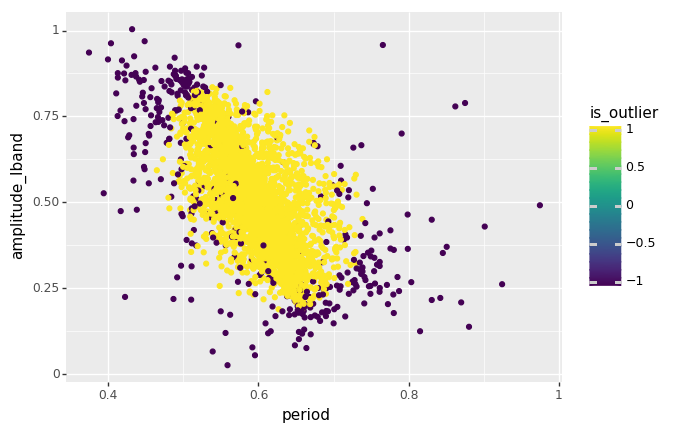

<ggplot: (8748920057327)>

In [4]:
ggplot(data, aes(x = PERIOD, y = AMPLITUDE, color = "is_outlier")) + geom_point()

In [5]:
data_clean[METALICITY] = data_clean.apply(get_jk_I_metalicity, axis=1)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


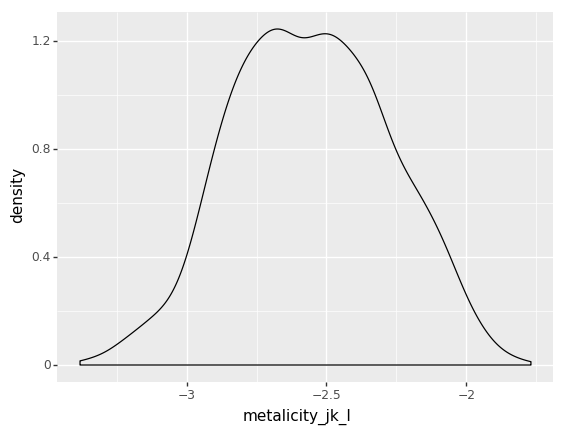

<ggplot: (-9223363287994574150)>

In [6]:
ggplot(data_clean, aes(x = METALICITY)) + geom_density()

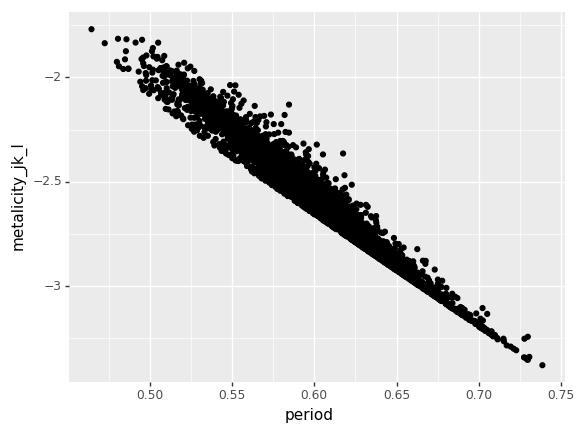

<ggplot: (-9223363287996776181)>

In [7]:
ggplot(data_clean, aes(x = PERIOD, y = METALICITY)) + geom_point()

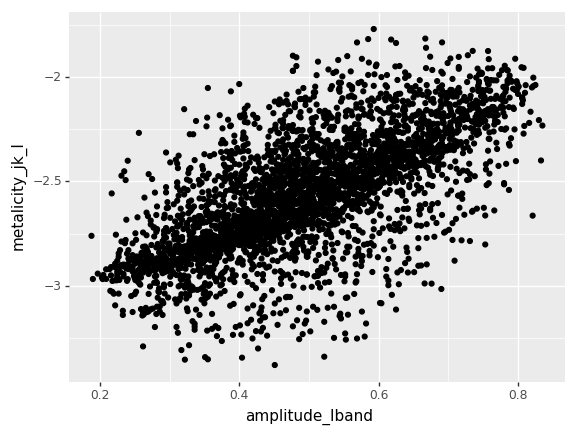

<ggplot: (-9223363287997877339)>

In [8]:
ggplot(data_clean, aes(x = AMPLITUDE, y = METALICITY)) + geom_point()

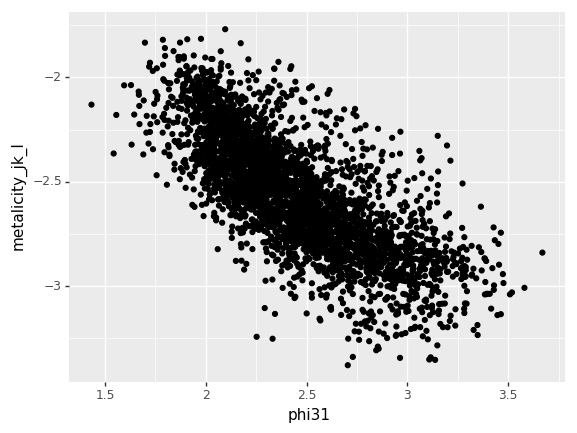

<ggplot: (-9223363287997901596)>

In [9]:
ggplot(data_clean, aes(x = PHI31, y = METALICITY)) + geom_point()

In [10]:
def get_phi31_V(row):
    """
    Skowron D.M. (2016)
    """
    phi31_I = row[PHI31]
    
    return 0.122 * (phi31_I ** 2) - 0.750 * phi31_I + 5.331

In [11]:
data_clean["phi31_V"] = data_clean.apply(get_phi31_V, axis=1)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
def get_metalicity_jkzw(row):
    """
    Sandage (2004)
    """
    metalicity_jk = row[METALICITY]
    
    return 1.05 * metalicity_jk - 0.20

In [13]:
data_clean["metalicity_jkzw"] = data_clean.apply(get_metalicity_jkzw, axis=1)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
def get_metalicity_s(row):
    """
    Sandage (2004)
    """
    logp = row[LOGP]
    amplitude_v = row[AMPLITUDE_V]
    
    return -1.453 * amplitude_v - 7.990 * logp - 2.145

In [15]:
data_clean["metalicity_s"] = data_clean.apply(get_metalicity_s, axis=1)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
data_clean.head()

,Unnamed: 0,id,magnitude_Iband,magnitude_Vband,period,period_uncertainty,time_max_bright,amplitude_Iband,R21,phi21,...,phi31,amplitude_Vband,is_outlier,logP,lnP,logp_over_ampV,metalicity_jk_I,phi31_V,metalicity_jkzw,metalicity_s
0,0,OGLE-SMC-RRLYR-0001,19.050,19.564,0.558814,9.000000e-07,6000.53594,0.669,0.431,4.215,...,2.199,1.001163,1,-0.252732,-0.581938,-3.961357,-2.307998,4.271693,-2.623398,-1.580359
1,1,OGLE-SMC-RRLYR-0002,19.004,19.597,0.594794,1.900000e-06,6000.46150,0.422,0.458,4.423,...,2.789,0.946174,1,-0.225633,-0.519540,-4.193411,-2.614742,4.188230,-2.945480,-1.716979
2,2,OGLE-SMC-RRLYR-0003,19.155,19.767,0.650679,3.300000e-06,6000.38613,0.279,0.323,4.450,...,3.062,0.506166,1,-0.186633,-0.429738,-2.712095,-2.929685,4.178353,-3.276169,-1.389263
3,3,OGLE-SMC-RRLYR-0005,19.052,19.641,0.565265,2.000000e-06,6000.02632,0.529,0.353,4.149,...,2.150,0.788259,1,-0.247748,-0.570460,-3.181698,-2.328300,4.282445,-2.644715,-1.310835
4,4,OGLE-SMC-RRLYR-0006,18.994,19.536,0.547184,8.000000e-07,6000.34708,0.693,0.454,4.263,...,2.107,1.048149,1,-0.261866,-0.602970,-4.002612,-2.217405,4.292363,-2.528276,-1.575649


In [17]:
#from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

#X = data_clean.as_matrix([PERIOD, AMPLITUDE, PHI31, METALICITY])
#X = preprocessing.scale(X)
X = data_clean.as_matrix([LOGP, AMPLITUDE])
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
#X = preprocessing.scale(X)

clustering_kmeans = KMeans(n_clusters = 10, random_state = 1)
clusters = clustering_kmeans.fit_predict(X)

#clustering_dbscan = DBSCAN()
#clusters = clustering_dbscan.fit_predict(X)

#clustering_agg = AgglomerativeClustering()
#clusters = clustering_agg.fit_predict(X)

In [18]:
data_clean["cluster"] = clusters

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


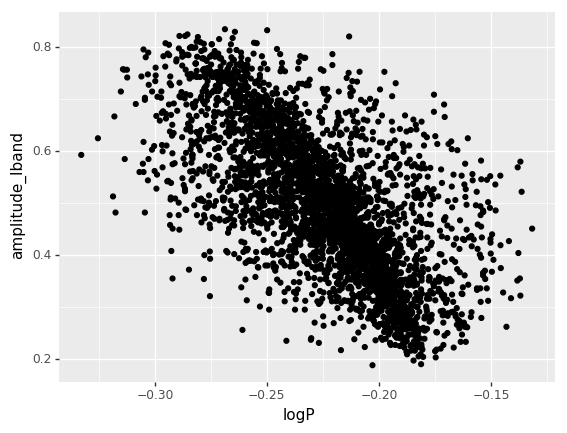

<ggplot: (-9223363288002754188)>

In [19]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE)) + geom_point()

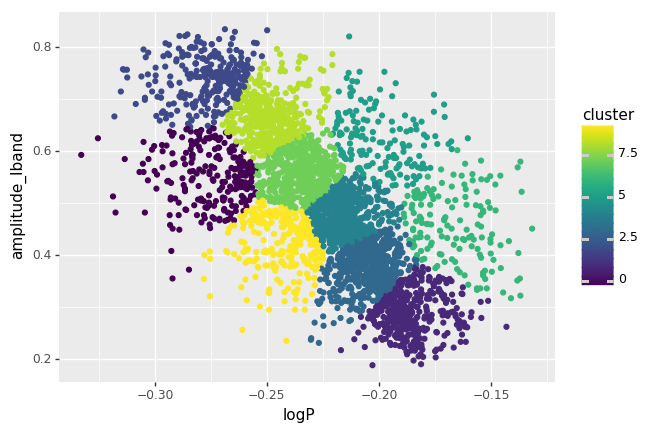

<ggplot: (8748852017749)>

In [20]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE, color = "cluster")) + geom_point()

In [21]:
data_clean["is_oost_II"] = data_clean["cluster"].map(lambda c: c == 5 or c == 6)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


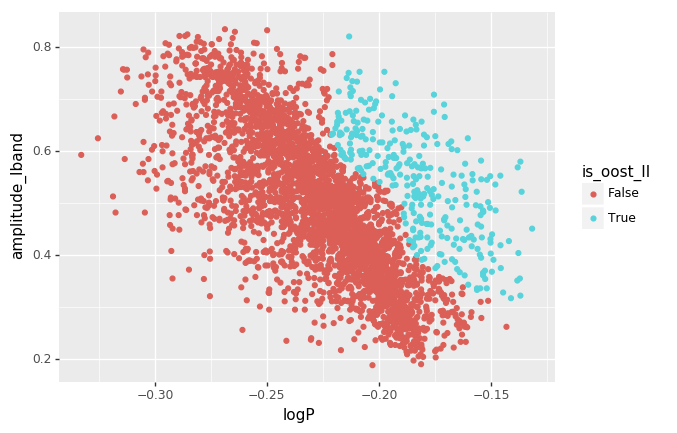

<ggplot: (8748860128646)>

In [22]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE, color = "is_oost_II")) + geom_point()

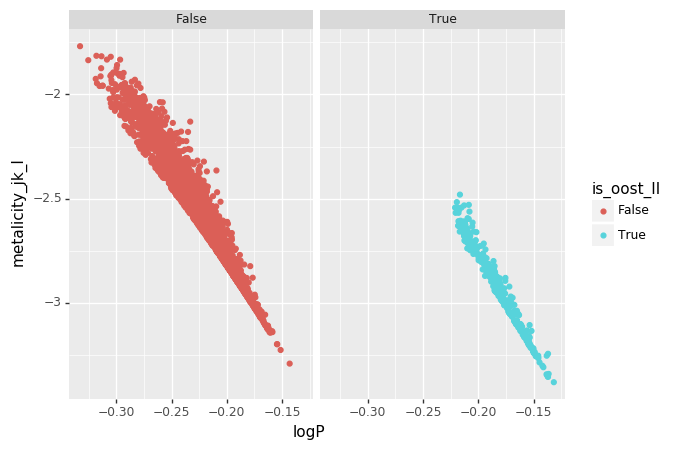

<ggplot: (8748856900086)>

In [23]:
ggplot(data_clean, aes(x = LOGP, y = METALICITY, color = "is_oost_II")) +\
    facet_wrap("~is_oost_II") +\
    geom_point()

In [24]:
X2 = data.as_matrix([LOGP, AMPLITUDE])
X2 = scaler.transform(X2)

data["cluster"] = clustering_kmeans.predict(X2)
data["is_oost_II"] = data["cluster"].map(lambda c: c == 6 or c == 7)

In [25]:
"""
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode()

oostII = go.Scatter3d(
    x=data_clean[data_clean["is_oost_II"] == True][LOGP],
    y=data_clean[data_clean["is_oost_II"] == True][AMPLITUDE],
    z=data_clean[data_clean["is_oost_II"] == True][PHI31],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

other = go.Scatter3d(
    x=data_clean[data_clean["is_oost_II"] == False][LOGP],
    y=data_clean[data_clean["is_oost_II"] == False][AMPLITUDE],
    z=data_clean[data_clean["is_oost_II"] == False][PHI31],
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

parts = [other, oostII]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=go.Scene(
        xaxis=go.XAxis(title='Log Period'),
        yaxis=go.YAxis(title='Amplitude I band'),
        zaxis=go.ZAxis(title='phi31')
    )
)
fig = go.Figure(data=parts, layout=layout)
py.offline.iplot(fig, filename='simple-3d-scatter')
"""

'\nimport plotly as py\nimport plotly.graph_objs as go\n\npy.offline.init_notebook_mode()\n\noostII = go.Scatter3d(\n    x=data_clean[data_clean["is_oost_II"] == True][LOGP],\n    y=data_clean[data_clean["is_oost_II"] == True][AMPLITUDE],\n    z=data_clean[data_clean["is_oost_II"] == True][PHI31],\n    mode=\'markers\',\n    marker=dict(\n        size=5,\n        line=dict(\n            color=\'rgba(217, 217, 217, 0.14)\',\n            width=0.5\n        ),\n        opacity=0.8\n    )\n)\n\nother = go.Scatter3d(\n    x=data_clean[data_clean["is_oost_II"] == False][LOGP],\n    y=data_clean[data_clean["is_oost_II"] == False][AMPLITUDE],\n    z=data_clean[data_clean["is_oost_II"] == False][PHI31],\n    mode=\'markers\',\n    marker=dict(\n        size=5,\n        line=dict(\n            color=\'rgba(217, 217, 217, 0.14)\',\n            width=0.5\n        ),\n        opacity=0.8\n    )\n)\n\nparts = [other, oostII]\nlayout = go.Layout(\n    margin=dict(\n        l=0,\n        r=0,\n       

In [26]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state = 1)
svc.fit(X, data_clean.as_matrix(["is_oost_II"]))

/home/chris/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)

In [27]:
data_clean["is_oost_II_linear"] = svc.predict(X)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


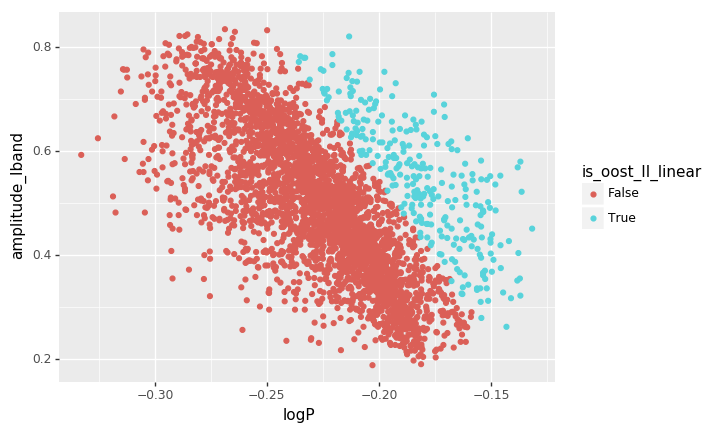

<ggplot: (-9223363287997972834)>

In [28]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE, color = "is_oost_II_linear")) + geom_point()

In [29]:
print("Means: %s" % scaler.mean_)
print("Deviations: %s" % scaler.scale_)
logp_mean = scaler.mean_[0]
logp_sc = scaler.scale_[0]
amp_mean = scaler.mean_[1]
amp_sc = scaler.scale_[1]

Means: [-0.22488074  0.49898124]
Deviations: [ 0.03181333  0.13687675]


In [30]:
def term(parts):
    print("x_%d = (%s - (%f)) / %f" % parts)
    
term((1, "log(period)", logp_mean, logp_sc))
term((2, "amplitude_I", amp_mean, amp_sc))

print("y = %f + (%f * %s) + (%f * %s)" % (svc.intercept_, svc.coef_[0][0], "x_1", svc.coef_[0][1], "x_2"))

print("if y >= 0 then True else False")

x_1 = (log(period) - (-0.224881)) / 0.031813
x_2 = (amplitude_I - (0.498981)) / 0.136877
y = -2.479075 + (2.426205 * x_1) + (1.729340 * x_2)
if y >= 0 then True else False


In [31]:
import numpy as np
import itertools

xs = np.arange(data_clean[LOGP].min(), data_clean[LOGP].max(), 0.005)
ys = np.arange(data_clean[AMPLITUDE].min(), data_clean[AMPLITUDE].max(), 0.01)
line = list(itertools.product(xs, ys))
line = pd.DataFrame(line, columns = [LOGP, AMPLITUDE])

In [32]:
X4 = scaler.transform(line.as_matrix([LOGP, AMPLITUDE]))

line["is_oost_II_linear"] = svc.predict(X4)

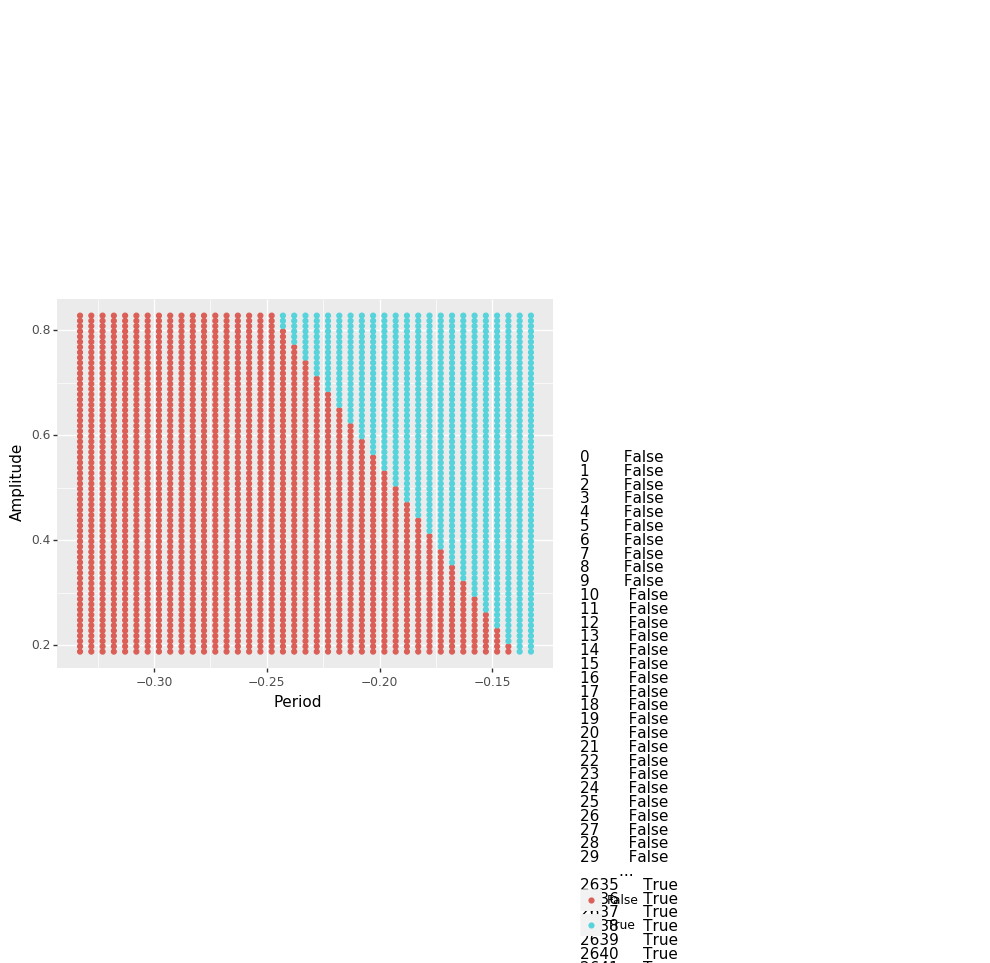

<ggplot: (8748852005801)>

In [33]:
ggplot(line) +\
    geom_point(aes(x = line[LOGP], y = line[AMPLITUDE], color = line["is_oost_II_linear"])) +\
    xlab("Period") +\
    ylab("Amplitude")

In [34]:
def f(row):
    logp = row[LOGP]
    amp = row[AMPLITUDE]
    
    x_1 = (logp - (-0.521370)) / 0.075583
    x_2 = (amp - (0.507340)) / 0.139656
    
    #value = -2.589064 + (2.584727 * x_1) + (1.816317 * x_2)
    
    #return value >= 0
    return svc.predict([[x_1,x_2]])[0]

In [35]:
line["is_oost_II_linear_2"] = line.apply(f, axis=1)

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(line["is_oost_II_linear"], line["is_oost_II_linear_2"])

array([[   7, 1835],
       [   0,  823]])

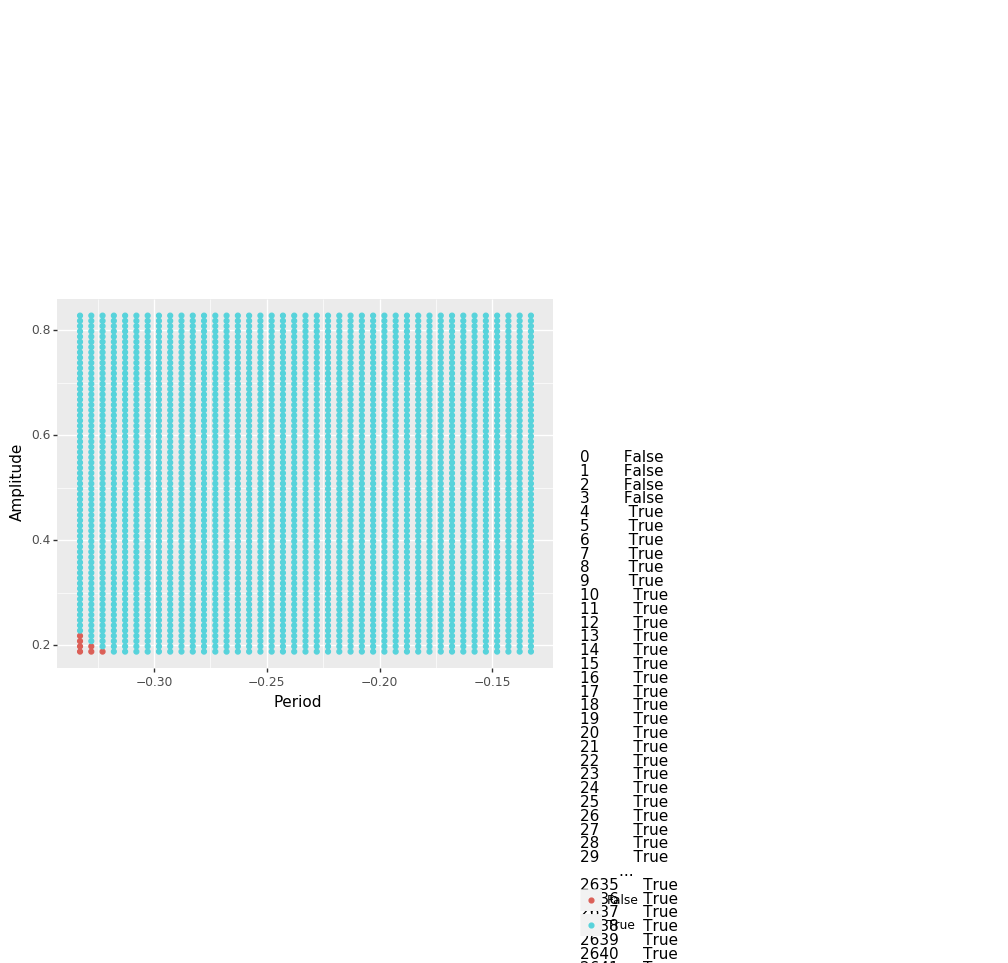

<ggplot: (8748858003334)>

In [37]:
ggplot(line) +\
    geom_point(aes(x = line[LOGP], y = line[AMPLITUDE], color = line["is_oost_II_linear_2"])) +\
    xlab("Period") +\
    ylab("Amplitude")

In [38]:
def scale_logp(logp):
    return (logp - (-0.521370)) / 0.075583

def scale_amp(amp):
    return (amp - (0.507340)) / 0.139656

In [39]:
line["scale_logp"] = line[LOGP].map(scale_logp)
line["scale_amp"] = line[AMPLITUDE].map(scale_amp)

In [40]:
X5 = line.as_matrix([LOGP, AMPLITUDE])
line["scale_logp_2"] = [r[0] for r in list(scaler.transform(X5))]
line["scale_amp_2"] = [r[1] for r in list(scaler.transform(X5))]

In [41]:
def f2(row):
    logp = row[LOGP]
    amp = row[AMPLITUDE]
    
    x_1 = (logp - (-0.521370)) / 0.075583
    x_2 = (amp - (0.507340)) / 0.139656
    
    #value = -2.589064 + (2.584727 * x_1) + (1.816317 * x_2)
    value = -2.604320 + (2.751891 * x_1) + (1.781723 * x_2)
    #value = svc.intercept_[0] + (svc.coef_[0][0] * x_1) + (svc.coef_[0][1] * x_2)
    
    return value

In [42]:
line["result"] = line.apply(f2, axis=1)

In [43]:
line["result_actual"] = svc.decision_function(line.as_matrix(["scale_logp", "scale_amp"]))

In [44]:
line

,logP,amplitude_Iband,is_oost_II_linear,is_oost_II_linear_2,scale_logp,scale_amp,scale_logp_2,scale_amp_2,result,result_actual
0,-0.332863,0.188,False,False,2.494039,-2.286619,-3.394247,-2.271980,0.184883,-0.382365
1,-0.332863,0.198,False,False,2.494039,-2.215014,-3.394247,-2.198922,0.312463,-0.258537
2,-0.332863,0.208,False,False,2.494039,-2.143410,-3.394247,-2.125863,0.440042,-0.134708
3,-0.332863,0.218,False,False,2.494039,-2.071805,-3.394247,-2.052805,0.567622,-0.010880
4,-0.332863,0.228,False,True,2.494039,-2.000200,-3.394247,-1.979746,0.695201,0.112949
5,-0.332863,0.238,False,True,2.494039,-1.928596,-3.394247,-1.906688,0.822780,0.236778
6,-0.332863,0.248,False,True,2.494039,-1.856991,-3.394247,-1.833629,0.950360,0.360606
7,-0.332863,0.258,False,True,2.494039,-1.785387,-3.394247,-1.760571,1.077939,0.484435
8,-0.332863,0.268,False,True,2.494039,-1.713782,-3.394247,-1.687513,1.205519,0.608263
9,-0.332863,0.278,False,True,2.494039,-1.642178,-3.394247,-1.614454,1.333098,0.732092


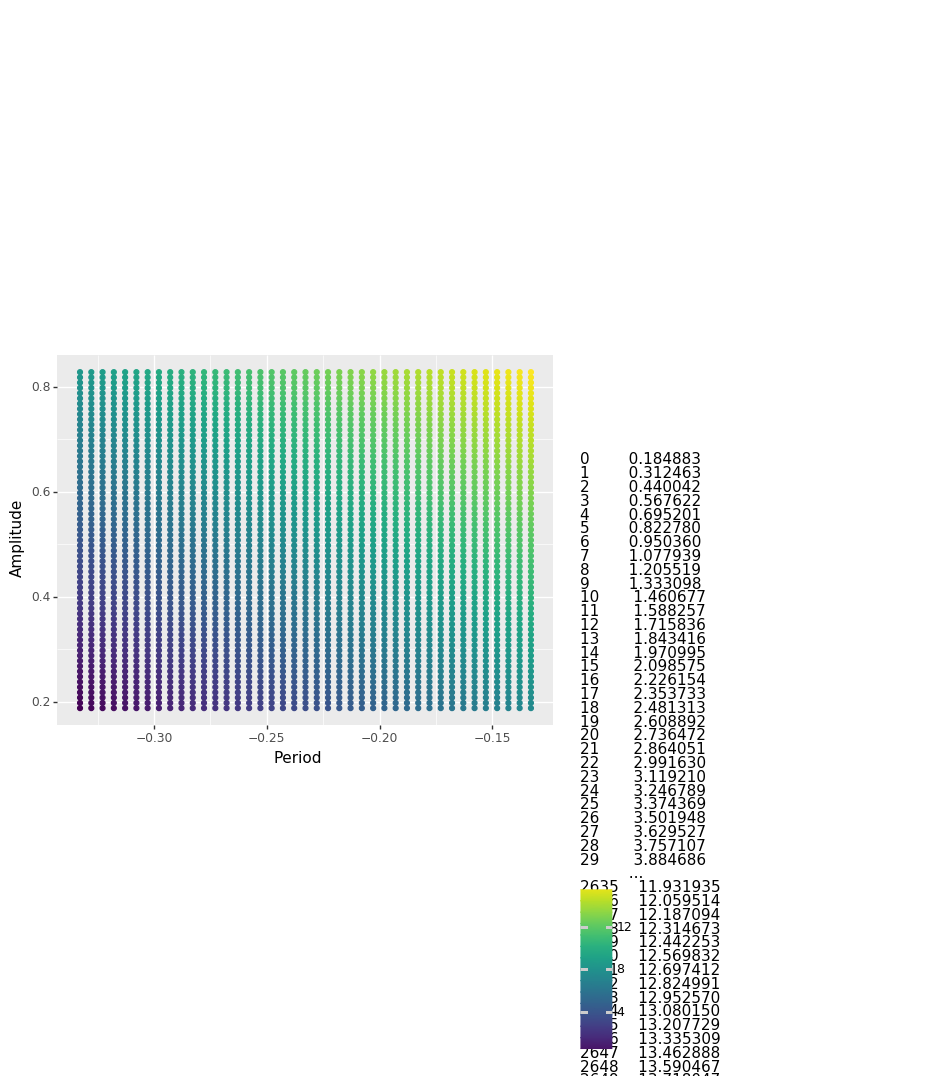

<ggplot: (-9223363288005966434)>

In [45]:
ggplot(line) +\
    geom_point(aes(x = line[LOGP], y = line[AMPLITUDE], color = line["result"])) +\
    xlab("Period") +\
    ylab("Amplitude")

In [46]:
svc.coef_.T

array([[ 2.42620542],
       [ 1.72934038]])

In [47]:
X6 = line.as_matrix(["scale_logp", "scale_amp"])
X6

array([[ 2.49403927, -2.28661855],
       [ 2.49403927, -2.21501403],
       [ 2.49403927, -2.14340952],
       ..., 
       [ 5.14013694,  2.15286132],
       [ 5.14013694,  2.22446583],
       [ 5.14013694,  2.29607034]])

In [48]:
a = np.array([np.array([r[0] * 2.75189097 + r[1] * 1.78172326]) for r in X6]) + svc.intercept_
a

array([[  0.31012749],
       [  0.43770692],
       [  0.56528635],
       ..., 
       [ 15.5018243 ],
       [ 15.62940373],
       [ 15.75698316]])

In [49]:
b = np.dot(X6, svc.coef_.T) + svc.intercept_
b

array([[ -0.38236538],
       [ -0.2585368 ],
       [ -0.13470822],
       ..., 
       [ 13.71498291],
       [ 13.83881149],
       [ 13.96264006]])

In [50]:
b.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0])

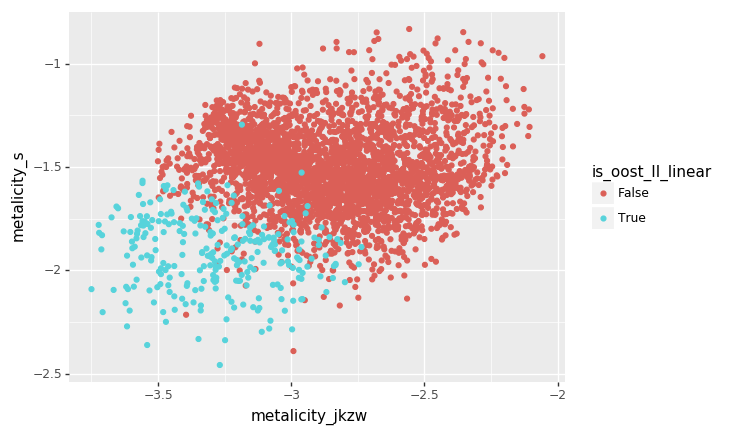

<ggplot: (-9223363288005960469)>

In [51]:
ggplot(data_clean, aes(x = "metalicity_jkzw", y = "metalicity_s", color = "is_oost_II_linear")) + geom_point()

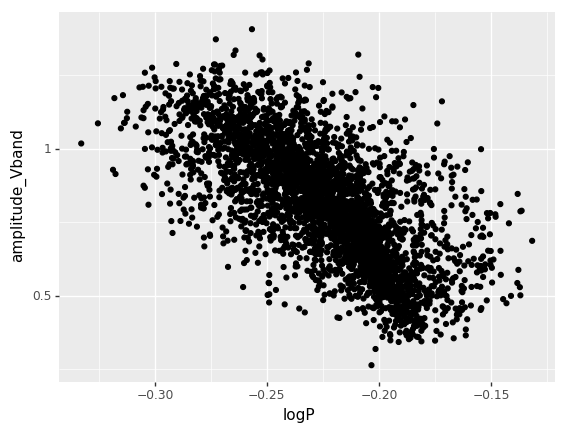

<ggplot: (-9223363288006142264)>

In [52]:
ggplot(data_clean, aes(x = LOGP, y = "amplitude_Vband")) + geom_point()

In [53]:
from sklearn.preprocessing import PolynomialFeatures

#poly3 = PolynomialFeatures(5)

#X3 = data_clean.as_matrix([LOGP, "metalicity_s", AMPLITUDE, AMPLITUDE_V, PHI31])
X3 = data_clean.as_matrix([METALICITY, "metalicity_jkzw", "metalicity_s", AMPLITUDE_V, LOGP, PHI31])

#X3 = poly3.fit_transform(X3)

scaler_3 = preprocessing.StandardScaler()
X3 = scaler_3.fit_transform(X3)
#X = preprocessing.scale(X)

clustering_kmeans_3 = KMeans(n_clusters = 5, random_state = 3) #6
clusters_3 = clustering_kmeans_3.fit_predict(X3)

In [54]:
data_clean["cluster_2"] = clusters_3

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


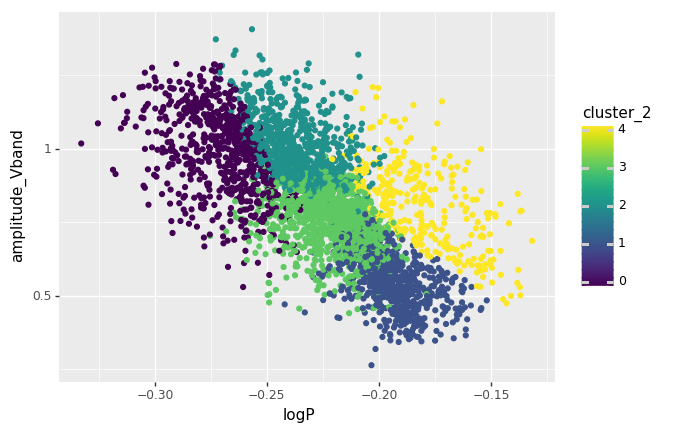

<ggplot: (8748848630739)>

In [55]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE_V, color = "cluster_2")) + geom_point()

In [56]:
data_clean["is_oost_II_2"] = data_clean["cluster_2"].map(lambda c: c == 4)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


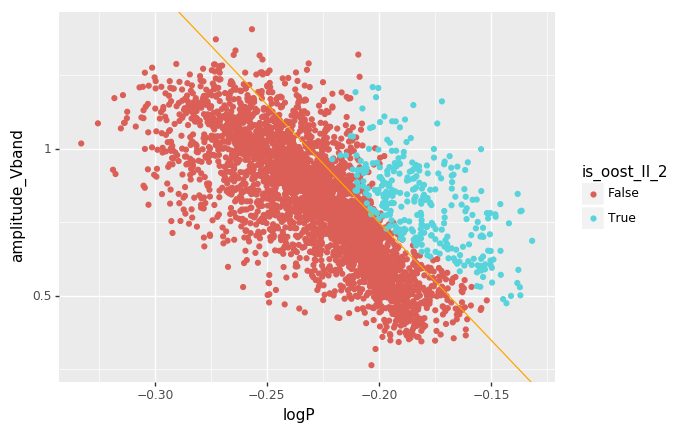

<ggplot: (8748848783203)>

In [57]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE_V, color = "is_oost_II_2")) + geom_point() +\
    geom_abline(aes(slope = -8.0, intercept = -0.85), color="orange")

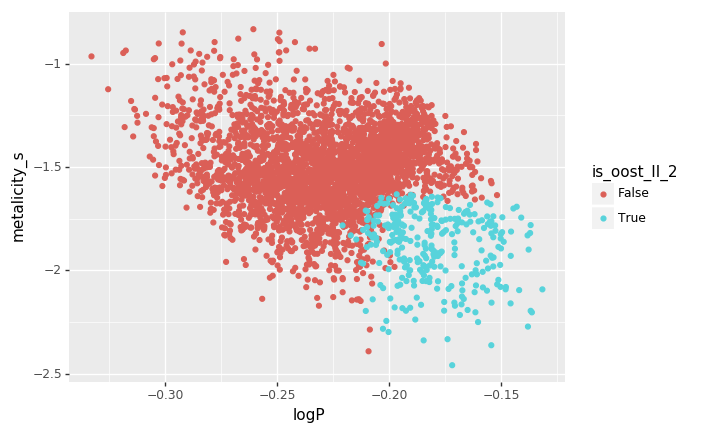

<ggplot: (8748860114636)>

In [58]:
ggplot(data_clean, aes(x = LOGP, y = "metalicity_s", color = "is_oost_II_2")) + geom_point()

In [59]:
#poly4 = PolynomialFeatures(2)

X4 = data_clean.as_matrix([LOGP, AMPLITUDE_V])
#scaler_4 = preprocessing.StandardScaler()
#X4 = scaler_4.fit_transform(X4)

#X4 = poly4.fit_transform(X4)

svc_2 = LinearSVC(random_state = 1)
svc_2.fit(X4, data_clean.as_matrix(["is_oost_II_2"]))

/home/chris/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)

In [60]:
data_clean["is_oost_II_2_linear"] = svc_2.predict(X4)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


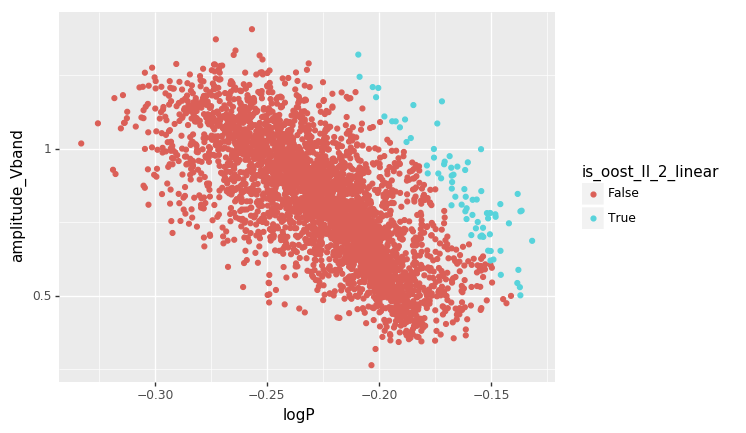

<ggplot: (8748856836111)>

In [61]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE_V, color = "is_oost_II_2_linear")) +\
    geom_point()

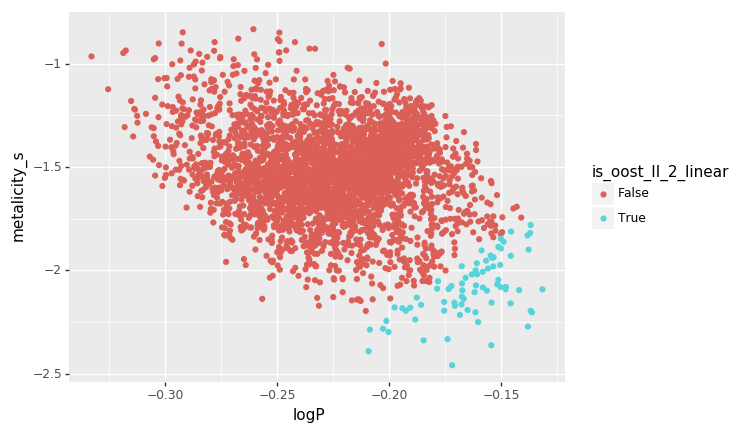

<ggplot: (-9223363288006142313)>

In [62]:
ggplot(data_clean, aes(x = LOGP, y = "metalicity_s", color = "is_oost_II_2_linear")) + geom_point()

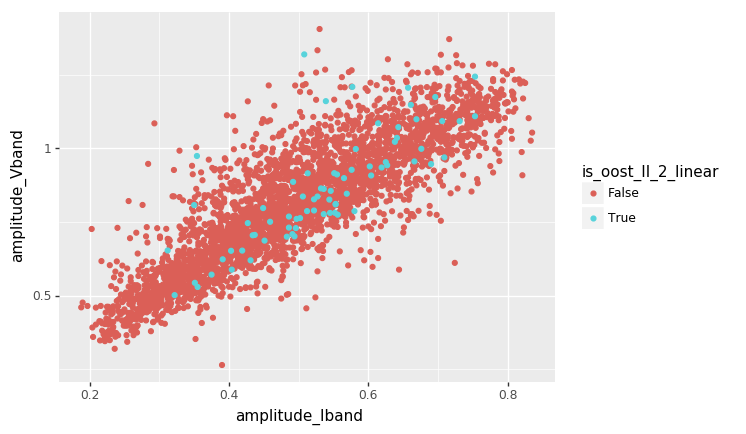

<ggplot: (-9223363288005987198)>

In [63]:
ggplot(data_clean, aes(x = AMPLITUDE, y = AMPLITUDE_V, color = "is_oost_II_2_linear")) + geom_point()

In [64]:
"""
print("Means: %s" % scaler_4.mean_)
print("Deviations: %s" % scaler_4.scale_)
logp_mean_4 = scaler_4.mean_[0]
logp_sc_4 = scaler_4.scale_[0]
amp_mean_4 = scaler_4.mean_[1]
amp_sc_4 = scaler_4.scale_[1]
"""

'\nprint("Means: %s" % scaler_4.mean_)\nprint("Deviations: %s" % scaler_4.scale_)\nlogp_mean_4 = scaler_4.mean_[0]\nlogp_sc_4 = scaler_4.scale_[0]\namp_mean_4 = scaler_4.mean_[1]\namp_sc_4 = scaler_4.scale_[1]\n'

In [65]:
#term((1, "log(period)", logp_mean_4, logp_sc_4))
#term((2, "amplitude_V", amp_mean_4, amp_sc_4))

#print("y = %f + (%f * %s) + (%f * %s)" % (svc_2.intercept_, svc_2.coef_[0][0], "x_1", svc_2.coef_[0][1], "x_2"))
print("y = %f + (%f * %s) + (%f * %s)" % (svc_2.intercept_, svc_2.coef_[0][0], "log(period)", svc_2.coef_[0][1], "amplitude_v"))

print("if y >= 0 then True else False")

y = 1.594682 + (17.276950 * log(period)) + (1.644024 * amplitude_v)
if y >= 0 then True else False


In [66]:
def f_3(logp):
    return (svc_2.intercept_ + svc_2.coef_[0][0] * logp) / ((-1.0) * svc_2.coef_[0][1])

In [67]:
slope_2 = (f_3(-0.9) - f_3(-0.2)) / ((-0.9) - (-0.2))
intercept_2 = f_3(0.0)

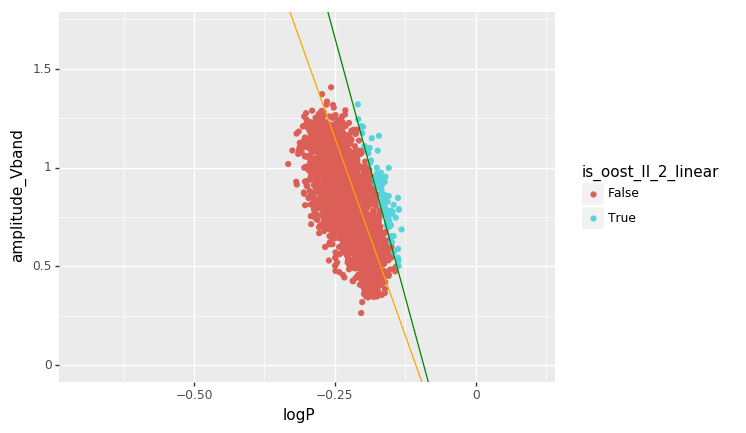

<ggplot: (8748860121920)>

In [68]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE_V, color = "is_oost_II_2_linear")) +\
    geom_point() +\
    geom_abline(aes(slope = -8.0, intercept = -0.85), color="orange") +\
    geom_abline(aes(slope = slope_2, intercept = intercept_2), color="green") +\
    xlim(-0.7, 0.1) +\
    ylim(0.0, 1.7)

In [69]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')

X5 = data_clean.as_matrix([METALICITY, "metalicity_s", AMPLITUDE_V, LOGP, PHI31])

#X3 = poly3.fit_transform(X3)

scaler_5 = preprocessing.StandardScaler()
X5 = scaler_3.fit_transform(X5)
#X = preprocessing.scale(X)

#clustering_kmeans_5 = KMeans(n_clusters = 5, random_state = 3) #6
clusters_5 = model.fit_predict(X5)

In [70]:
data_clean["cluster_3"] = clusters_5

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


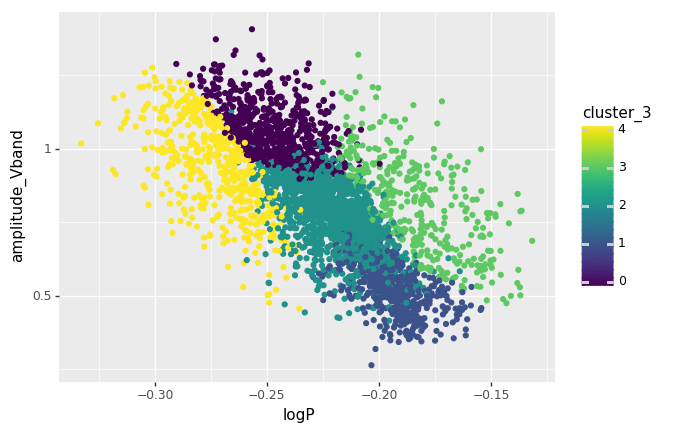

<ggplot: (-9223363288005985364)>

In [71]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE_V, color = "cluster_3")) + geom_point()

In [84]:
data_clean["is_oost_II_3"] = data_clean["cluster_3"].map(lambda c: c == 3)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


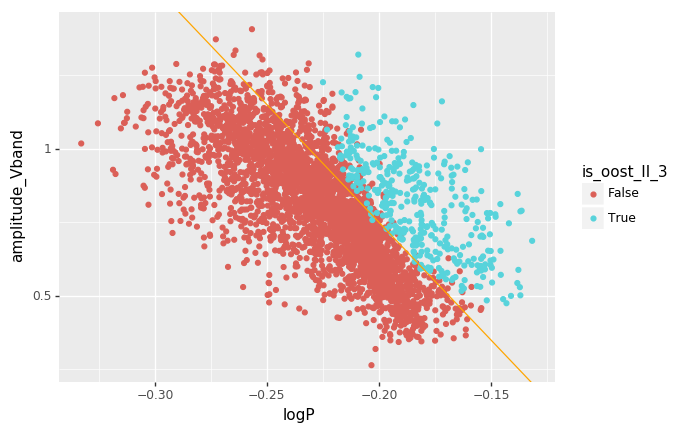

<ggplot: (-9223363288005944113)>

In [85]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE_V, color = "is_oost_II_3")) + geom_point() +\
    geom_abline(aes(slope = -8.0, intercept = -0.85), color="orange")

In [86]:
#poly4 = PolynomialFeatures(2)

X6 = data_clean.as_matrix([LOGP, AMPLITUDE_V])
#scaler_4 = preprocessing.StandardScaler()
#X4 = scaler_4.fit_transform(X4)

#X4 = poly4.fit_transform(X4)

svc_3 = LinearSVC(random_state = 1, C = 20.0)
svc_3.fit(X6, data_clean.as_matrix(["is_oost_II_3"]))

/home/chris/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=20.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)

In [87]:
data_clean["is_oost_II_3_linear"] = svc_3.predict(X6)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


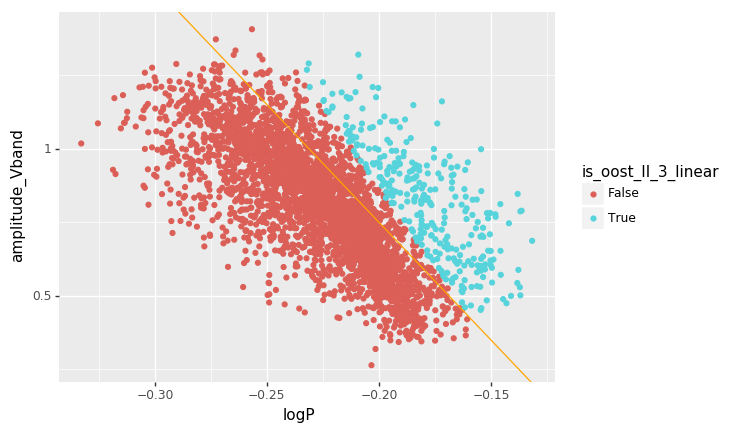

<ggplot: (8748852021494)>

In [88]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE_V, color = "is_oost_II_3_linear")) +\
    geom_point() +\
    geom_abline(aes(slope = -8.0, intercept = -0.85), color="orange")

In [89]:
print("y = %f + (%f * %s) + (%f * %s)" % (svc_3.intercept_, svc_3.coef_[0][0], "log(period)", svc_3.coef_[0][1], "amplitude_v"))

print("if y >= 0 then True else False")

y = 6.451298 + (52.990185 * log(period)) + (4.786357 * amplitude_v)
if y >= 0 then True else False


In [90]:
def f_4(logp):
    return (svc_3.intercept_ + svc_3.coef_[0][0] * logp) / ((-1.0) * svc_3.coef_[0][1])

In [91]:
slope_3 = (f_4(-0.9) - f_4(-0.2)) / ((-0.9) - (-0.2))
intercept_3 = f_4(0.0)

In [96]:
print("amp_V = %f + %f * log(period)" % (slope_3,intercept_3))

amp_V = -11.071090 + -1.347851 * log(period)


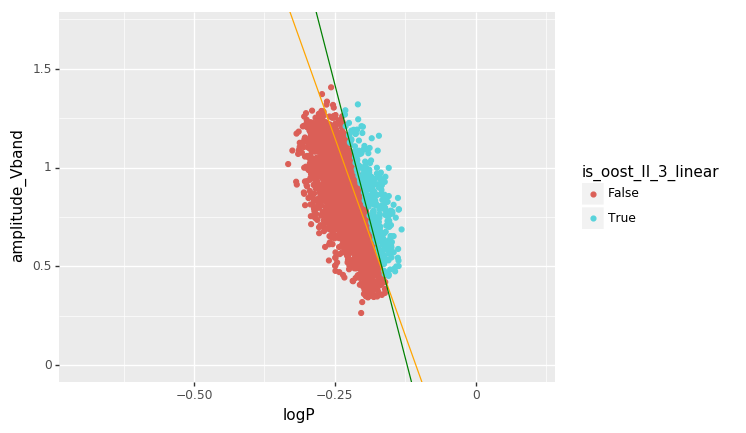

<ggplot: (-9223363287994653724)>

In [92]:
ggplot(data_clean, aes(x = LOGP, y = AMPLITUDE_V, color = "is_oost_II_3_linear")) +\
    geom_point() +\
    geom_abline(aes(slope = -8.0, intercept = -0.85), color="orange") +\
    geom_abline(aes(slope = slope_3, intercept = intercept_3), color="green") +\
    xlim(-0.7, 0.1) +\
    ylim(0.0, 1.7)

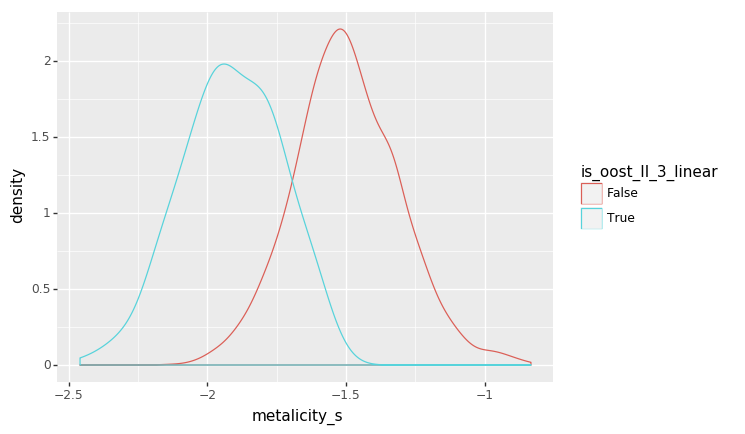

<ggplot: (8748860188904)>

In [93]:
ggplot(data_clean, aes(x = "metalicity_s", color = "is_oost_II_3_linear")) +\
    geom_density()

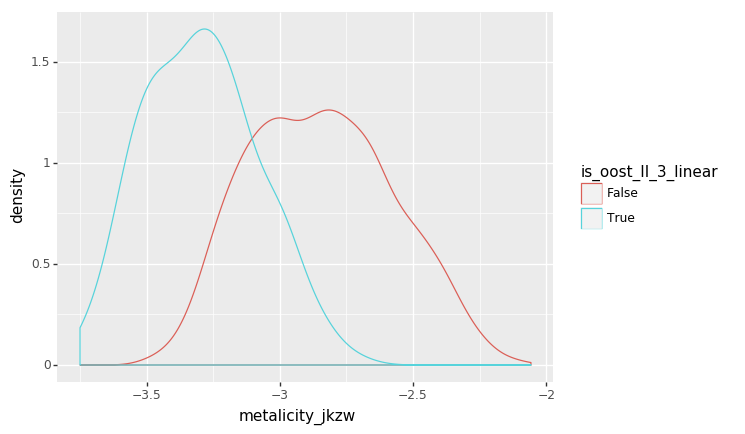

<ggplot: (-9223363288005959543)>

In [94]:
ggplot(data_clean, aes(x = "metalicity_jkzw", color = "is_oost_II_3_linear")) +\
    geom_density()